In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
features = pd.read_csv("alt_acsincome_ca_features_85.csv")
features.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0


In [4]:
labels = pd.read_csv("alt_acsincome_ca_labels_85.csv")
labels.head()

,PINCP
0,True
1,True
2,False
3,True
4,False


In [5]:
dataset = pd.concat([features, labels], axis=1)
dataset.head()

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0,True
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0,True
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0,False
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0,True
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0,False


In [6]:
shape = dataset.shape

* AGEP: Age
* COW: Class of worker
* SCHL: Educational attainment
* MAR: Marital status
* OCCP: Occupation
* POBP: Place of Birth
* RELP: Relationship
* WKHP: Hours worked per week past 12 months
* SEX: Sex
* RAC1P: Recoded detailed race code
* PINCP: Total person's income

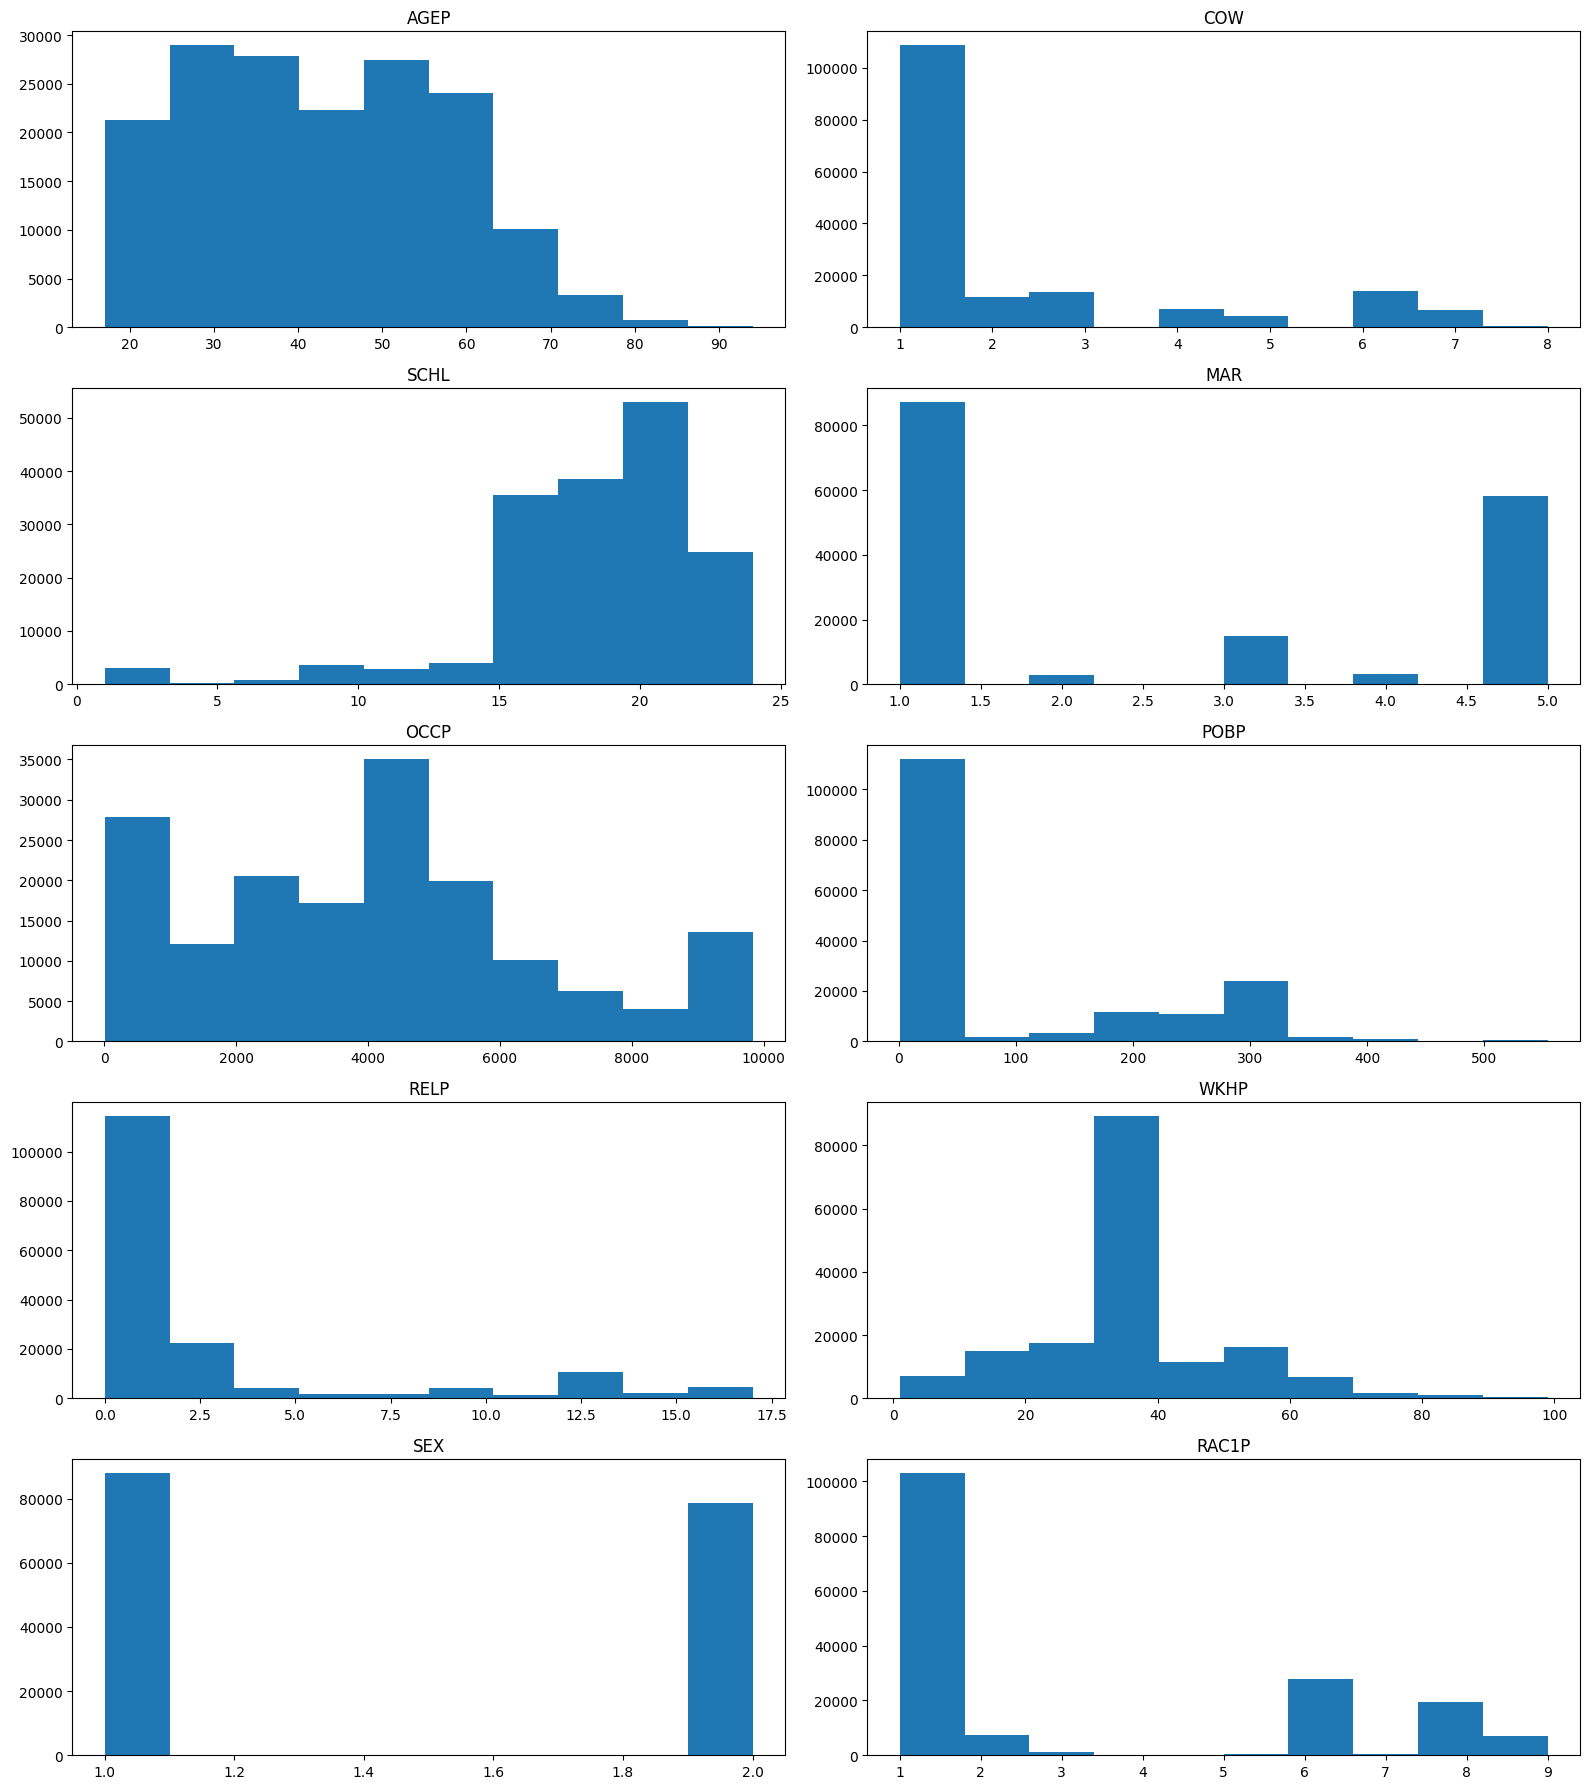

In [7]:
import matplotlib.pyplot as plt

num_cols = len(features.columns)
nrows = num_cols // 2 + num_cols % 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 18))
axes = axes.flatten()

for i in range(num_cols):
    axes[i].hist(features.iloc[:, i])
    axes[i].set_title(features.columns[i])

for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

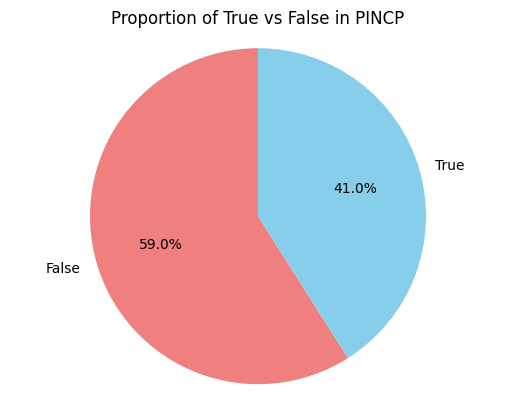

In [8]:
counts = labels['PINCP'].value_counts()

plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'skyblue'])
plt.title('Proportion of True vs False in PINCP')
plt.axis('equal')

plt.show()

In [9]:
subdataset_of_trues = dataset[dataset["PINCP"] == True]
subdataset_of_trues.head()
subdataset_of_trues.shape

(68203, 11)

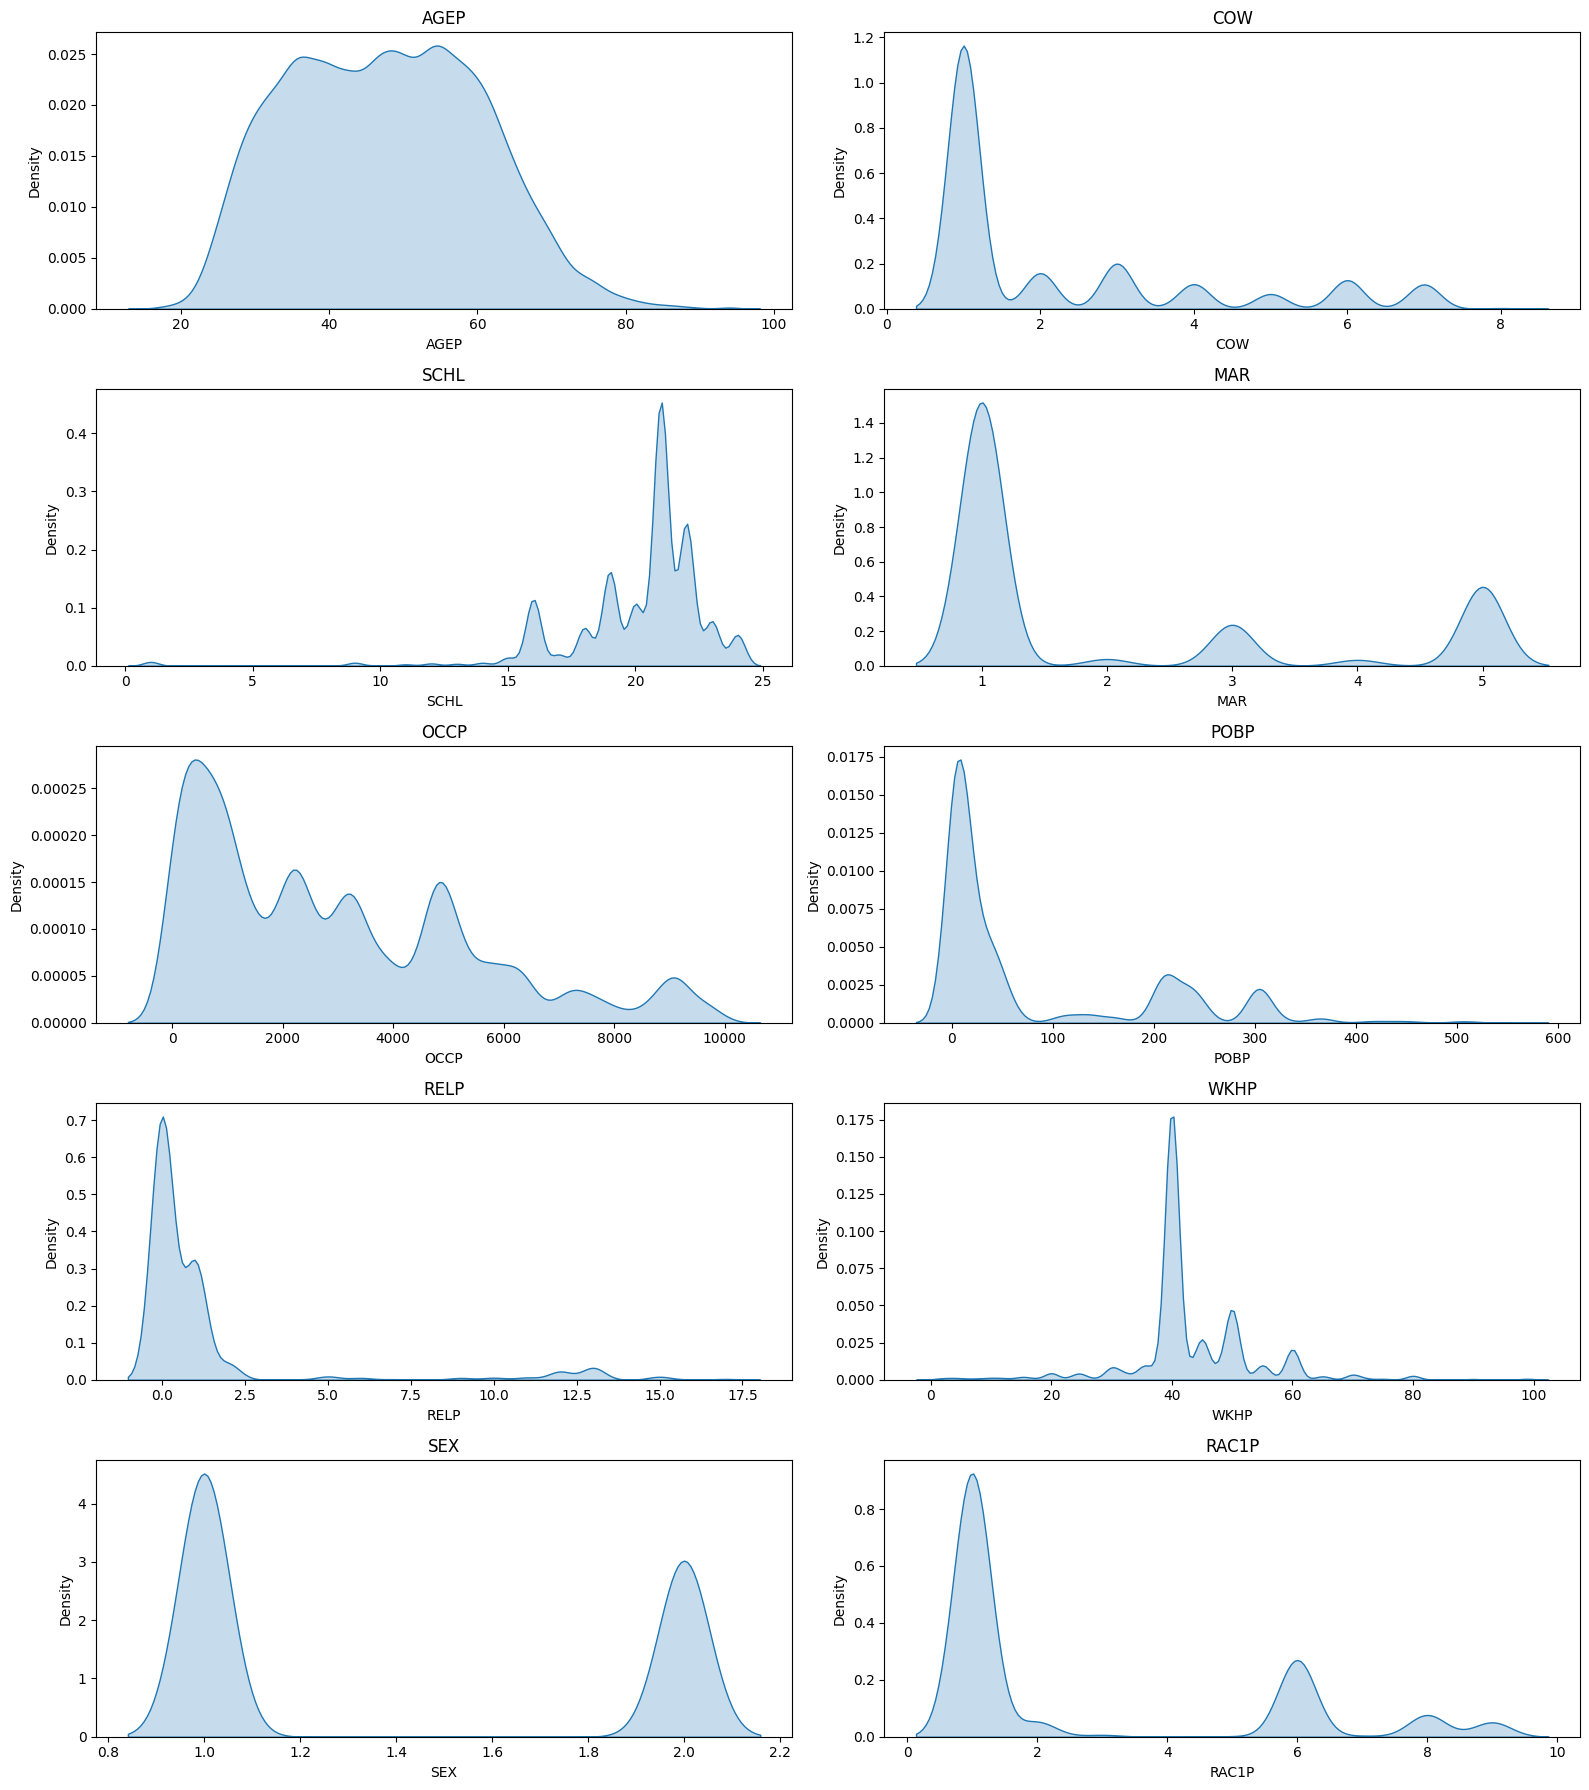

In [10]:
import seaborn as sns

subfeatures_of_trues = subdataset_of_trues.drop(columns=["PINCP"])
num_cols = len(subfeatures_of_trues.columns)
nrows = num_cols // 2 + num_cols % 2
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 18))
axes = axes.flatten()

for i in range(num_cols):
    sns.kdeplot(subfeatures_of_trues.iloc[:, i], ax=axes[i], shade=True)
    axes[i].set_title(subfeatures_of_trues.columns[i])

for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

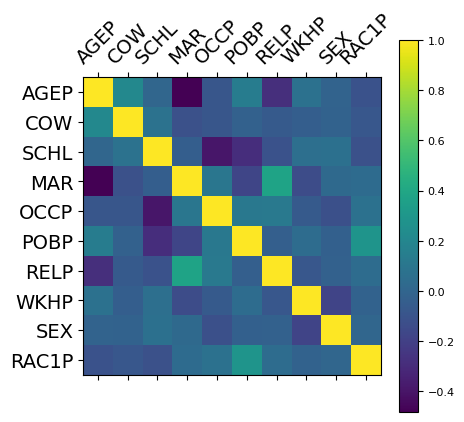

In [11]:
plt.matshow(features.corr())
plt.xticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features.select_dtypes(['number']).shape[1]), features.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ["COW", "SCHL", "MAR", "OCCP", "POBP", "RELP", "SEX", "RAC1P"]

encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
features_to_encode = features[columns_to_encode]

encoded_features_array = encoder.fit_transform(features_to_encode)
encoded_features_columns = encoder.get_feature_names_out(columns_to_encode)
encoded_features = pd.DataFrame(encoded_features_array, columns=encoded_features_columns, index=features.index)

features_remaining = features.drop(columns=columns_to_encode)
features_encoded = pd.concat([features_remaining, encoded_features], axis=1)
features_encoded.head()

,AGEP,WKHP,COW_1.0,COW_2.0,COW_3.0,COW_4.0,COW_5.0,COW_6.0,COW_7.0,COW_8.0,...,SEX_2.0,RAC1P_1.0,RAC1P_2.0,RAC1P_3.0,RAC1P_4.0,RAC1P_5.0,RAC1P_6.0,RAC1P_7.0,RAC1P_8.0,RAC1P_9.0
0,41.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,77.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,80.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,36.0,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features_encoded, labels, test_size=0.3, train_size=0.7)
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(116420, 816)
(49895, 816)
(116420, 1)
(49895, 1)


## 2. Random Forest

### 2.1 Qualité d'apprentissage avec le paramétrage par défaut (Expe 1)

| Expérimentation 1     | Train   | Test   |
|-----------------------|---------|--------|
| Taille Jeu de Données | 116420  | 49895  |


In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score

random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
xg_boost = GradientBoostingClassifier()

for model in [random_forest, ada_boost, xg_boost]:
    print(model)
    validation_result = cross_validate(model, features_train, labels_train)
    
    print("Cross-validation Fit Times:", np.mean(validation_result["fit_time"]))
    
    model.fit(features_train, labels_train)
    
    train_prediction = model.predict(features_train)
    train_accuracy = accuracy_score(labels_train, train_prediction)
    train_confusion_matrix = confusion_matrix(labels_train, train_prediction)
    
    print("Training Accuracy:", train_accuracy)
    print("Training Confusion Matrix:\n", train_confusion_matrix)
    
    test_prediction = model.predict(features_test)
    test_accuracy = accuracy_score(labels_test, test_prediction)
    test_confusion_matrix = confusion_matrix(labels_test, test_prediction)

    print("Test Accuracy:", test_accuracy)
    print("Test Confusion Matrix:\n", test_confusion_matrix)

    print("=======================")

RandomForestClassifier()
Cross-validation Fit Times: 47.358891010284424
Training Accuracy: 0.9982906717058925
Training Confusion Matrix:
 [[68543   109]
 [   90 47678]]
Test Accuracy: 0.8105421384908308
Test Confusion Matrix:
 [[25159  4301]
 [ 5152 15283]]
AdaBoostClassifier()
Cross-validation Fit Times: 16.170943689346313
Training Accuracy: 0.7785861535818588
Training Confusion Matrix:
 [[57064 11588]
 [14189 33579]]
Test Accuracy: 0.7783144603667702
Test Confusion Matrix:
 [[24469  4991]
 [ 6070 14365]]
GradientBoostingClassifier()
Cross-validation Fit Times: 58.86868848800659
Training Accuracy: 0.8029805875279161
Training Confusion Matrix:
 [[58161 10491]
 [12446 35322]]
Test Accuracy: 0.8013428199218359
Test Confusion Matrix:
 [[24943  4517]
 [ 5395 15040]]


| Résultats en entraînement <br/> (hyper-param par défaut) | Random Forest   | AdaBoost   | XGBoost |
|----------------------------------------------------------|-----------------|------------|---------|
| accuracy                                                 |       0.998     |     0.779  |  0.803  |
| temps de calcul (sec.)                                   |       47.4      |     16.2   |   58.9  |
| matrice de confusion                                     |       [68543&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;109]<br/>[90&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;47678]          |   [57064&nbsp;&nbsp;11588]<br/>[14189&nbsp;&nbsp;33579]         |   [58161&nbsp;&nbsp;10491]<br/>[12446&nbsp;&nbsp;35322]      |

<hr />

| Résultats en test <br/> (hyper-param par défaut) | Random Forest   | AdaBoost   | XGBoost |
|--------------------------------------------------|-----------------|------------|---------|
| accuracy                                         |     0.811       |    0.778   |   0.801 |
| matrice de confusion                             |     [25159&nbsp;&nbsp;4301]<br/>[5152&nbsp;&nbsp;15283]            |  [24469&nbsp;&nbsp;4991]<br/>[6070&nbsp;&nbsp;14365]          |   [24943&nbsp;&nbsp;4517]<br/>[5395&nbsp;&nbsp;15040]      |

### 2.2 Optimisation des hyperparamètres des modèles (expe 2) 

| Expérimentation 1     | Train   | Test   |
|-----------------------|---------|--------|
| Taille Jeu de Données | 116420  | 49895  |


#### 1. Liste des hyperparamètres

##### a) Random Forest


##### b) AdaBoost


##### c) XGBoost


#### 2. Nombre de plis dans la validation croisée

On garde la valeur par défaut de Scikit-Learn: **5 plis**

#### 3. Estimation du nombre d'entraînements




In [38]:
from sklearn.model_selection import GridSearchCV